In [64]:
import pandas as pd
import numpy as np
import xlrd
import math
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df = pd.read_excel("6_Forecasting_Data.xlsm", sheet_name="Timeseries")

In [3]:
df

,t,Demand
0,1,165
1,2,171
2,3,147
3,4,143
4,5,164
5,6,160
6,7,152
7,8,150
8,9,159
9,10,169


In [111]:
data = df.to_numpy()
series = pd.Series(data[:, 1], data[:, 0])

In [5]:
data

array([[  1, 165],
       [  2, 171],
       [  3, 147],
       [  4, 143],
       [  5, 164],
       [  6, 160],
       [  7, 152],
       [  8, 150],
       [  9, 159],
       [ 10, 169],
       [ 11, 173],
       [ 12, 203],
       [ 13, 169],
       [ 14, 166],
       [ 15, 162],
       [ 16, 147],
       [ 17, 188],
       [ 18, 161],
       [ 19, 162],
       [ 20, 169],
       [ 21, 185],
       [ 22, 188],
       [ 23, 200],
       [ 24, 229],
       [ 25, 189],
       [ 26, 218],
       [ 27, 185],
       [ 28, 199],
       [ 29, 210],
       [ 30, 193],
       [ 31, 211],
       [ 32, 208],
       [ 33, 216],
       [ 34, 218],
       [ 35, 264],
       [ 36, 304]], dtype=int64)

In [112]:
series

1.0     165.0
2.0     171.0
3.0     147.0
4.0     143.0
5.0     164.0
6.0     160.0
7.0     152.0
8.0     150.0
9.0     159.0
10.0    169.0
11.0    173.0
12.0    203.0
13.0    169.0
14.0    166.0
15.0    162.0
16.0    147.0
17.0    188.0
18.0    161.0
19.0    162.0
20.0    169.0
21.0    185.0
22.0    188.0
23.0    200.0
24.0    229.0
25.0    189.0
26.0    218.0
27.0    185.0
28.0    199.0
29.0    210.0
30.0    193.0
31.0    211.0
32.0    208.0
33.0    216.0
34.0    218.0
35.0    264.0
36.0    304.0
dtype: float64

In [11]:
SES = SimpleExpSmoothing(series).fit()

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
SES.forecast(12)

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    289.958166
37    289.958166
38    289.958166
39    289.958166
40    289.958166
41    289.958166
42    289.958166
43    289.958166
44    289.958166
45    289.958166
46    289.958166
47    289.958166
dtype: float64

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


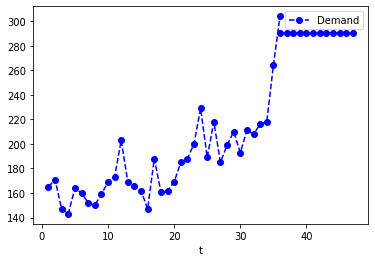

In [46]:
#df.Demand.plot(style="--", color="blue")
df.plot.line(x='t', y='Demand', style="--", marker="o", color="blue")
SES.forecast(12).plot(style="--", marker="o", color="blue")


In [42]:
SES.sse

14551.848333915868

In [44]:
math.sqrt(SES.sse/(36-1))

20.39036770768833

In [48]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [50]:
x=df.t[:18]
y=df.Demand[:18]
linregress(x,y)

LinregressResult(slope=0.8369453044375644, intercept=155.8823529411765, rvalue=0.30308617886240374, pvalue=0.22148686835726447, stderr=0.6578805720970533)

In [51]:
Hz = Holt(series).fit()

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [52]:
Hz.forecast(12)

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    290.320147
37    293.869445
38    297.418743
39    300.968040
40    304.517338
41    308.066636
42    311.615934
43    315.165232
44    318.714530
45    322.263828
46    325.813126
47    329.362423
dtype: float64

In [54]:
Hz.params

{'smoothing_level': 0.6608136050293513,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 158.99599068312165,
 'initial_slope': 3.5492978658760395,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
Hz.resid

1      2.454711
2      3.283307
3    -26.435645
4    -16.515909
5     11.848731
6     -3.530370
7    -12.746751
8     -9.872822
9      2.101975
10     7.163663
11     2.880519
12    27.427735
13   -28.246183
14   -16.130019
15   -13.020381
16   -22.965634
17    29.661072
18   -20.488666
19    -9.498775
20     0.228847
21    12.528324
22     3.700139
23     9.705739
24    28.742757
25   -33.800146
26    13.986153
27   -31.805385
28    -0.337252
29     7.336311
30   -18.060921
31     8.324683
32    -3.725678
33     3.187003
34    -0.468310
35    42.291858
36    50.795525
dtype: float64

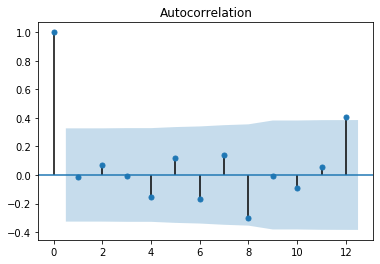

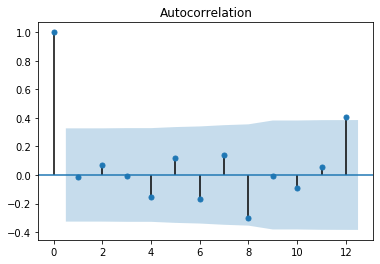

In [57]:
plot_acf(Hz.resid, lags=12)

In [58]:
acf(Hz.resid, nlags=12)

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        , -0.01736206,  0.06753744, -0.00440462, -0.15176792,
        0.1199185 , -0.16848861,  0.13962339, -0.30455665, -0.00583066,
       -0.09231976,  0.0524205 ,  0.40895093])

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


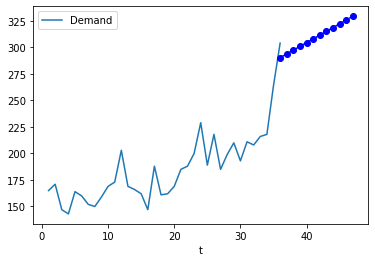

In [61]:
df.plot.line(x='t', y='Demand')
Hz.forecast(12).plot(style="--", marker="o", color="blue")

In [80]:
smoothed = [None for i in range(36)]
mean1 = [0 for i in range(12)]
mean2 = [0 for i in range(12)]
for i in range(6,30):
    for j in range(12):
        mean1[j] = data[i-6+j][1]
        mean2[j] = data[i-6+j+1][1]
    smoothed[i] = (np.mean(mean1) + np.mean(mean2))/ 2


In [81]:
for i in range(36):
    df.loc[i,'smoothed'] = smoothed[i]

In [82]:
df

,t,Demand,smoothed
0,1,165,NaN
1,2,171,NaN
2,3,147,NaN
3,4,143,NaN
4,5,164,NaN
5,6,160,NaN
6,7,152,163.166667
7,8,150,163.125000
8,9,159,163.541667
9,10,169,164.333333


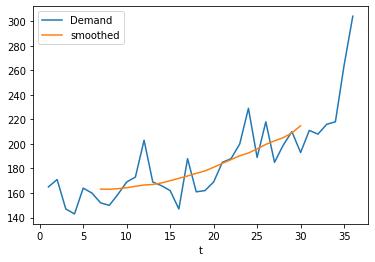

In [84]:
df.plot.line(x='t')

In [85]:
SeasonalFactorEstimate = [None for i in range(36)]
for i in range(6,30):
    SeasonalFactorEstimate[i] = data[i][1]/smoothed[i]
SeasonalFactorEstimate

[None,
 None,
 None,
 None,
 None,
 None,
 0.9315628192032686,
 0.9195402298850575,
 0.9722292993630574,
 1.028397565922921,
 1.0453172205438066,
 1.2189141856392294,
 1.0119760479041917,
 0.9868714391875156,
 0.9524742773150418,
 0.8548582505451903,
 1.081236520488857,
 0.9143398012304781,
 0.9101123595505618,
 0.9337016574585635,
 1.0047522063815342,
 1.0040053404539386,
 1.0507880910683014,
 1.189095629597577,
 0.9644907505847332,
 1.0920475892298058,
 0.9133923061098539,
 0.970337261275904,
 1.0047846889952152,
 0.8985451018428711,
 None,
 None,
 None,
 None,
 None,
 None]

In [100]:
InitialSeasonalFactors = [0 for i in range(12)]
for i in range(0,6):
    InitialSeasonalFactors[i] = (SeasonalFactorEstimate[i+12] + SeasonalFactorEstimate[i+24]) / 2
for i in range(6,12):
    InitialSeasonalFactors[i] = (SeasonalFactorEstimate[i] + SeasonalFactorEstimate[i+12]) / 2
InitialSeasonalFactors

[0.9882333992444625,
 1.0394595142086607,
 0.9329332917124478,
 0.9125977559105471,
 1.0430106047420362,
 0.9064424515366746,
 0.9208375893769152,
 0.9266209436718105,
 0.9884907528722957,
 1.0162014531884298,
 1.0480526558060541,
 1.2040049076184032]

In [102]:
ISF_x3 = [0 for i in range(36)]
for i in range(36):
    ISF_x3[i] = InitialSeasonalFactors[i%12]
ISF_x3

[0.9882333992444625,
 1.0394595142086607,
 0.9329332917124478,
 0.9125977559105471,
 1.0430106047420362,
 0.9064424515366746,
 0.9208375893769152,
 0.9266209436718105,
 0.9884907528722957,
 1.0162014531884298,
 1.0480526558060541,
 1.2040049076184032,
 0.9882333992444625,
 1.0394595142086607,
 0.9329332917124478,
 0.9125977559105471,
 1.0430106047420362,
 0.9064424515366746,
 0.9208375893769152,
 0.9266209436718105,
 0.9884907528722957,
 1.0162014531884298,
 1.0480526558060541,
 1.2040049076184032,
 0.9882333992444625,
 1.0394595142086607,
 0.9329332917124478,
 0.9125977559105471,
 1.0430106047420362,
 0.9064424515366746,
 0.9208375893769152,
 0.9266209436718105,
 0.9884907528722957,
 1.0162014531884298,
 1.0480526558060541,
 1.2040049076184032]

In [103]:
DeseasonalizedData = [0 for i in range(36)]
for i in range(36):
    DeseasonalizedData[i] = data[i][1] / ISF_x3[i]
DeseasonalizedData

[166.96460585743006,
 164.50857167840934,
 157.5675359705235,
 156.69554201053379,
 157.2371357054049,
 176.5142395181901,
 165.0671103716029,
 161.87849090223762,
 160.85127709893854,
 166.30560748535268,
 165.06804218433683,
 168.60396391701315,
 171.01223266609503,
 159.69837952406988,
 173.64585596751567,
 161.07863409474453,
 180.2474482476593,
 177.6174535151788,
 175.92678868552414,
 182.38309974985438,
 187.15400165599766,
 185.00268761684202,
 190.83010657148768,
 190.19856028076853,
 191.2503667094199,
 209.72437792920022,
 198.2992799629037,
 218.0588311894841,
 201.34023474472582,
 212.92030141881682,
 229.13921242373823,
 224.47150738443617,
 218.51494247402968,
 214.5243930876147,
 251.89574067436374,
 252.49066517621674]

In [104]:
Seas = ExponentialSmoothing(series, trend="add", seasonal="mul", seasonal_periods=12).fit()

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [105]:
Seas.params

{'smoothing_level': 0.2105406658923509,
 'smoothing_slope': 0.2105406580853047,
 'smoothing_seasonal': 0.10525226536070365,
 'damping_slope': nan,
 'initial_level': 174.33328798480414,
 'initial_slope': 1.1805499975620573,
 'initial_seasons': array([0.93748581, 0.9888166 , 0.86284025, 0.84989079, 0.9566672 ,
        0.86890229, 0.87826401, 0.86694039, 0.9072826 , 0.91781651,
        1.01915537, 1.16255999]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
Seas.forecast(12)

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    244.055576
37    262.051610
38    233.706163
39    233.747217
40    268.743830
41    247.750277
42    254.536769
43    255.838929
44    272.341234
45    280.019878
46    314.037083
47    362.469505
dtype: float64

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


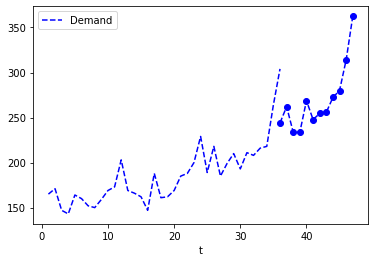

In [108]:
df.plot.line(x='t', y='Demand',style="--", color="blue")
Seas.forecast(12).plot(style="--", marker="o", color="blue")